## Anomaly detection using LOF method

In [114]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix

In [115]:
data = pd.read_csv("g.csv")# Loading the dataset
data = data.sort_values(by='timestamp', ascending=True)
data = data.dropna()
data = data.reset_index()
print(data.count())

index        142539
timestamp    142539
value        142539
label        142539
dtype: int64


In [116]:
# Create the Local Outlier Factor (LOF) object
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [117]:
# Fit the LOF object to the data
lof.fit(data)

LocalOutlierFactor(contamination=0.1)

In [118]:
# anomaly scores for each data point
anomaly_scores = -lof.negative_outlier_factor_
anomaly_scores

array([1.25888532, 1.21961876, 1.18471515, ..., 1.18366642, 1.21854039,
       1.25777359])

In [119]:
# calculating the lower and upper bounds
q1 = np.percentile(anomaly_scores, 25)
q3 = np.percentile(anomaly_scores, 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [120]:
# set the threshold
threshold = upper_bound
threshold

1.000000000178054

In [121]:
# indices of the data points that are considered anomalies
anomaly_indices = np.where(anomaly_scores > threshold)[0]

In [123]:
# the data points that are considered anomalies
anomalies = data.iloc[anomaly_indices]

In [124]:
anomalies.count()

index        14988
timestamp    14988
value        14988
label        14988
dtype: int64

In [125]:
predicted_labels = lof.fit_predict(data)
# Converting the predicted labels to binary values (0 for normal, 1 for anomaly)
predicted_labels = [1 if x == -1 else 0 for x in predicted_labels]
true_labels = data["label"]

142539

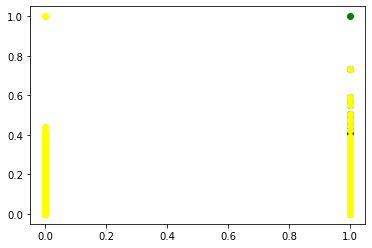

In [126]:
plt.scatter(true_labels, data['value'], color = 'green')
plt.scatter(predicted_labels, data['value'], color = 'yellow')
len(predicted_labels)

In [127]:
true_labels.count()

142539

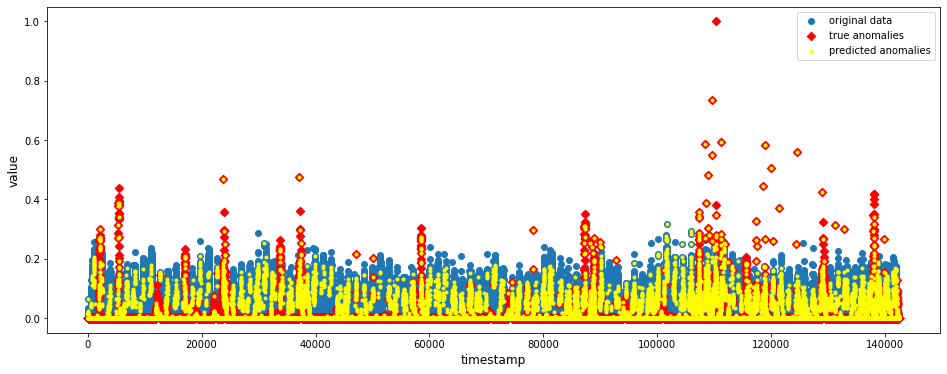

In [138]:
#Plotting original dataset with anomalies and the predicted anomalies
plt.figure(figsize=(16,6))
plt.scatter(data.index, data['value'], zorder=1, label = 'original data')
plt.scatter(data.index, data['label']*data['value'], color='r', marker='D', zorder=2, label = 'true anomalies')
plt.scatter(data.index, predicted_labels * data['value'], color='yellow', marker='.', zorder=3, label = 'predicted anomalies') 
plt.ylabel('value', fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.legend()
plt.show()

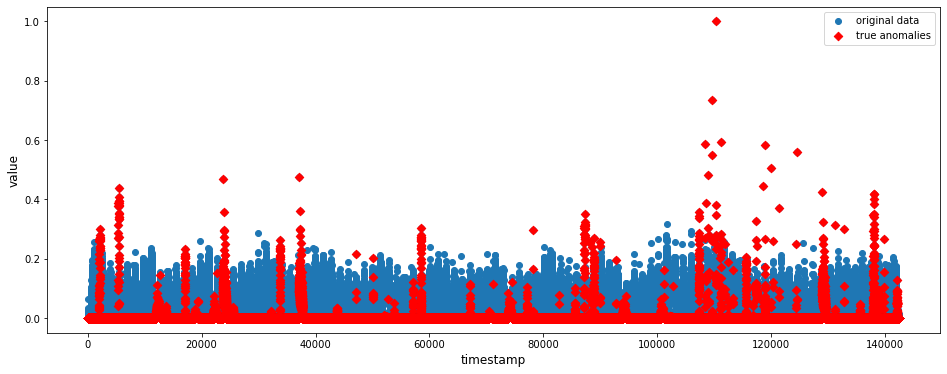

In [140]:
#plot of original data with labeled anomalies
plt.figure(figsize=(16,6))
plt.scatter(data.index, data['value'], zorder=1, label = 'original data')
plt.scatter(data.index, data['label']*data['value'], color='r', marker='D', zorder = 2, label = 'true anomalies')
plt.ylabel('value', fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.legend()
plt.show()

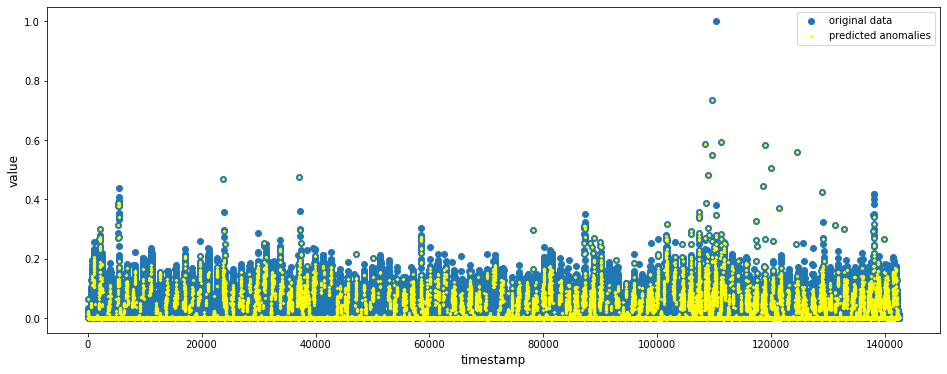

In [139]:
#Plot of original data with predicted anomalies
plt.figure(figsize=(16,6))
plt.scatter(data.index, data['value'], zorder=1, label = 'original data')
plt.scatter(data.index, predicted_labels * data['value'], color='yellow', marker='D', zorder=2, s = 3, label = 'predicted anomalies')
plt.ylabel('value', fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.legend()
plt.show()

In [84]:
print("Mean squared error:", mse)

Mean squared error: 0.13599786725036656
